그래프 겹쳐서 + 주기성 조사

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

전처리

In [37]:
data1 = pd.read_csv('1floor.csv', encoding='cp949')
data3 = pd.read_csv('301.csv', encoding='cp949')
data_out = pd.read_csv('opendata.csv', encoding='cp949')

In [38]:
data1['created_at'] = pd.to_datetime(data1['created_at'])
data1 = data1.rename(columns={'field6':'pm10'})
data1 = data1.set_index('created_at', inplace=False)
data1 = data1.iloc[:, 6]
data1 = pd.DataFrame(data1)
data1 = data1.replace("-", np.nan)
data1 = data1.dropna(axis=0)

In [39]:
data3['created_at'] = pd.to_datetime(data3['created_at'])
data3 = data3.rename(columns={'field6':'pm10'})
data3 = data3.set_index('created_at', inplace=False)
data3 = data3.iloc[:, 6]
data3 = pd.DataFrame(data3)
data3 = data3.replace("-", np.nan)
data3 = data3.dropna(axis=0)

In [40]:
data_out = data_out.dropna(how='all')
data_out = data_out.replace("-", np.nan)
data_out = data_out.fillna(0)

In [41]:
for x in range(data_out.shape[0]) :
    try :
        data_out.iloc[x,0] = pd.to_datetime(data_out.iloc[x, 0])
    except Exception :
        date = data_out.iloc[x + 1, 0]
        date = date[:11]
        date = date + "0:00"
        data_out.iloc[x, 0] = pd.to_datetime(date)
    


In [42]:
data_out = data_out[['날짜', 'pm10']]
data_out = data_out.set_index('날짜', inplace=False)
data_out = data_out.iloc[:,0].astype(str).astype(float)
data_out = pd.DataFrame(data_out)

In [47]:
for i in range(1, len(data1)):
    if (data1.iloc[i,0]>data1.iloc[i-1,0]+20) or (data1.iloc[i,0] > 200):
        data1.iloc[i,0]=data1.iloc[i-1,0]
        
for i in range(1, len(data3)):
    if (data3.iloc[i,0]>data3.iloc[i-1,0]+20) or (data3.iloc[i,0] > 200):
        data3.iloc[i,0]=data3.iloc[i-1,0]

겹쳐서 보여주기

In [49]:
df1 = data1.loc['2019-05-21 1:00' : '2019-05-24 14']
df2 = data3.loc['2019-05-21 1:00' : '2019-05-24 14']
df3 = data_out.loc['2019-05-21 1:00' : '2019-05-24 14']

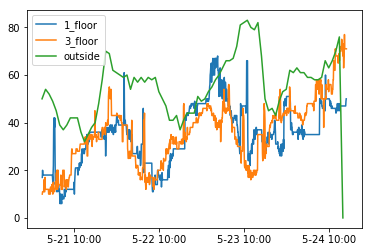

In [69]:
plt.plot(df1, label='1_floor')
plt.plot(df2, label='3_floor')
plt.plot(df3, label='outside')
plt.legend(loc='upper left')
tick = ['2019-05-21 10:00', '2019-05-22 10:00','2019-05-23 10:00','2019-05-24 10:00']
tick_lab = ["5-21 10:00", "5-22 10:00", "5-23 10:00", "5-24 10:00"]
plt.xticks(tick, tick_lab)
plt.show()

In [70]:
df4 = data1.loc['2019-05-31 1:00' : '2019-06-03 20:00']
df5 = data3.loc['2019-05-31 1:00' : '2019-06-03 20:00']
df6 = data_out.loc['2019-05-31 1:00' : '2019-06-03 20:00']

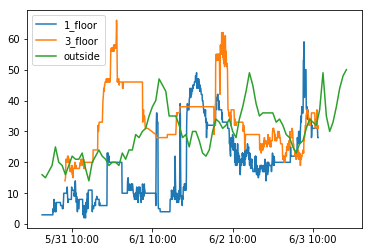

In [72]:
plt.plot(df4, label='1_floor')
plt.plot(df5, label='3_floor')
plt.plot(df6, label='outside')
plt.legend(loc='upper left')
tick = ['2019-05-31 10:00', '2019-06-01 10:00','2019-06-02 10:00','2019-06-03 10:00']
tick_lab = ["5/31 10:00", "6/1 10:00", "6/2 10:00", "6/3 10:00"]
plt.xticks(tick, tick_lab)
plt.show()

In [95]:
pr1 = data1.loc['2019-05-13 20:00' : '2019-05-17 1:00']
out1 = data_out.loc['2019-05-13 20:00' : '2019-05-17 1:00']
pr2 = data1.loc['2019-05-17 1:00' : '2019-05-21 1:00']
out2 = data_out.loc['2019-05-17 1:00' : '2019-05-21 1:00']
pr3 = data1.loc['2019-05-25 1:00' : '2019-05-29 1:00']
out3 = data_out.loc['2019-05-25 1:00' : '2019-05-29 1:00']
pr4 = data1.loc['2019-05-31 1:00' : '2019-06-03 1:00']
pr5 = data3.loc['2019-05-31 1:00' : '2019-06-03 1:00']
out4 = data_out.loc['2019-05-31 1:00' : '2019-06-03 1:00']

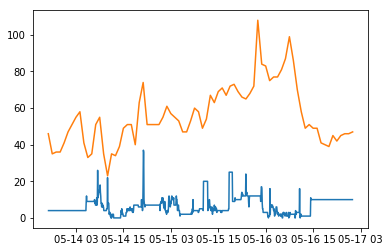

In [96]:
plt.plot(pr1)
plt.plot(out1)

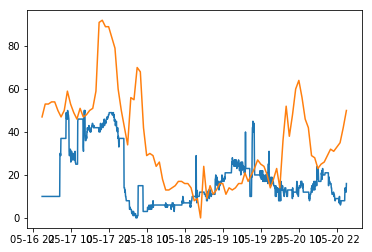

In [97]:
plt.plot(pr2)
plt.plot(out2)

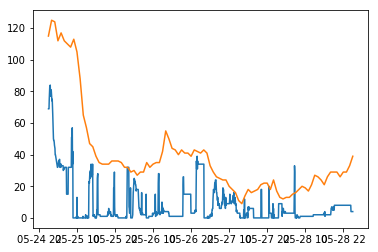

In [98]:
plt.plot(pr3)
plt.plot(out3)

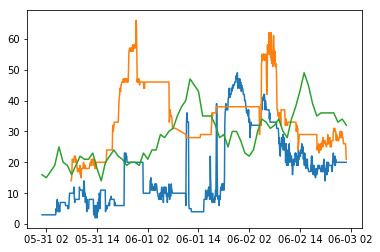

In [99]:
plt.plot(pr4)
plt.plot(pr5)
plt.plot(out4)